# **Отчёт о выполнении домашнего задания к лекции «Визуализация данных»**

![](https://drive.google.com/uc?export=view&id=1KQTAg7HBlNGesGbXDlxEeuX2vN_rd0pD)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams

%load_ext lab_black

In [ ]:
rcParams["figure.figsize"] = 11, 7

<div class="alert alert-block alert-info">

## **Обязательная часть**

## Провести базовый [EDA](https://en.wikipedia.org/wiki/Exploratory_data_analysis) выбранного набора данных.

## Требования к анализу:

### - построить не менее 4 визуализаций различных видов;
### - каждая визуализация должным образом оформлена и читается даже в отрыве от контекста;
### - по каждой визуализации необходимо написать вывод (какую гипотезу на ее основе можно выдвинуть?).

## Для работы используется датасет из курса Нетологии ["A/B-тестирование"](https://netology.ru/profile/program/abt-13/schedule), где представлены данные по сессиям пользователей мобильного приложения Gett и действиям в приложении (значимые этапы воронки).

Поля:

● User_id - id пользователя

● Hour - час старта сессии

● os - операционная система пользователя

● Order class - тариф

● App_opened - приложение открыто

● Price_seen - пользователь ввел данные маршрута и показана цена

● Order_made - пользователь кликнул по кнопке заказа

● Surge - в этот период был включен surge (надбавка к стоимости поездки в период повышенного спроса)

● Ride_completed - поездка успешно завершена

● User_cancelled - пользователь отменил поездку

● Age - возраст пользователя

● City_center_order - заказ был сделан из центра города

● Distance - дистанция в км

● Rfm - rfm-сегмент пользователя

> RFM-анализ — метод сегментации клиентов по частоте и сумме покупок для выявления потребителей, приносящих больше денег. Recency (Давность сделки). Сколько времени (часов, дней, недель, месяцев) прошло с момента последней покупки клиента.Frequency (Частота сделки). Как часто потребитель совершает покупки или другие целевые действия. Monetary (Вложения). Сколько средств/ресурсов потратил клиент за определенный промежуток времени. Этот показатель необязательно измерять в деньгах. Например, некоторые маркетологи оценивают время нахождения на сайте, количество переходов по внутренним страницам и т.п.

In [ ]:
df_gett = pd.read_csv(
    "https://drive.google.com/uc?id=1a42RrQ5k6s-40E2aPPjDVzO4WhHAgI_o", index_col=0
)

In [ ]:
df_gett

,user_id,hour,os,order_class,surge,app_opened,price_seen,order_made,ride_completed,user_cancelled,city_center_order,distance,age,rfm
0,867689,12,iOS,business,no surge,1,1,1,1,0,0,7.982135,20,low
1,752172,5,Android,economy,no surge,1,1,1,1,0,1,2.908468,27,high
2,486559,15,Android,comfort,no surge,1,1,1,1,0,0,7.224614,21,high
3,304024,0,Android,economy,no surge,1,1,1,1,0,1,1.874349,52,low
4,139420,0,Android,business,no surge,1,1,1,1,0,0,10.704778,19,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101495,288445,16,Android,comfort,no surge,1,1,1,1,0,0,1.725907,28,high
101496,627754,2,iOS,comfort,surge,1,1,1,1,0,1,6.206134,23,low
101497,784442,1,iOS,economy,no surge,1,1,1,1,0,0,6.624225,21,high
101498,232993,13,iOS,business,no surge,1,1,1,1,0,0,8.825188,26,high


In [ ]:
df_gett.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101500 entries, 0 to 101499
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   user_id            101500 non-null  int64  
 1   hour               101500 non-null  int64  
 2   os                 101500 non-null  object 
 3   order_class        101500 non-null  object 
 4   surge              91431 non-null   object 
 5   app_opened         101500 non-null  int64  
 6   price_seen         101500 non-null  int64  
 7   order_made         101500 non-null  int64  
 8   ride_completed     101500 non-null  int64  
 9   user_cancelled     101500 non-null  int64  
 10  city_center_order  101500 non-null  int64  
 11  distance           91431 non-null   float64
 12  age                101500 non-null  int64  
 13  rfm                101500 non-null  object 
dtypes: float64(1), int64(9), object(4)
memory usage: 11.6+ MB


## **1. График** (и сопутствующая визуализация)
### а) количество входов пользователей в приложение в разрезе часа суток
#### Оценим использование приложения в разрезе часа суток

''

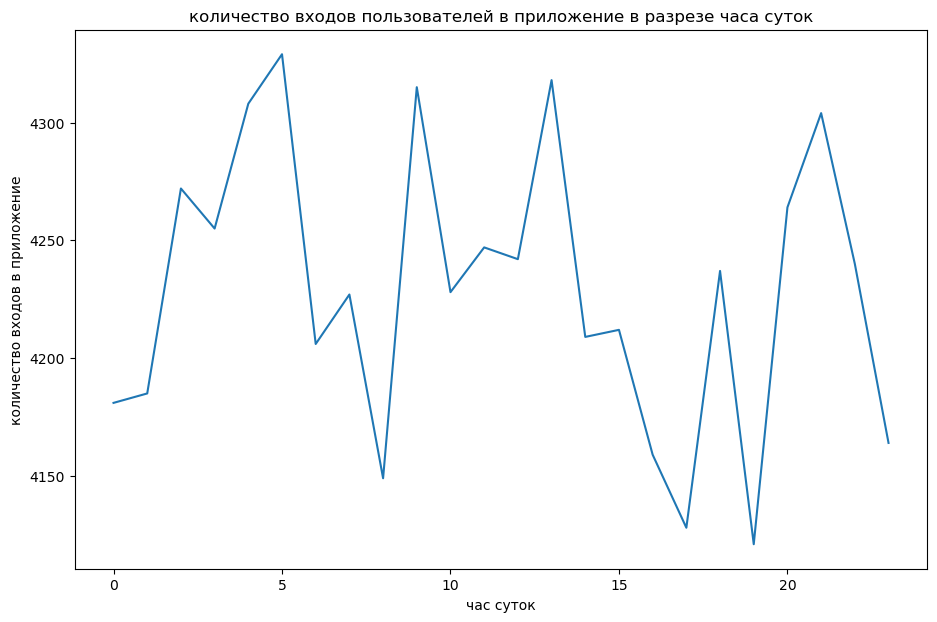

In [ ]:
df_add_opened = df_gett[["hour", "app_opened"]].groupby("hour").sum()
plt.plot(df_add_opened.index, df_add_opened["app_opened"])
plt.title("количество входов пользователей в приложение в разрезе часа суток")
plt.xlabel("час суток")
plt.ylabel("количество входов в приложение")
;

#### Результаты визацлизации не позволяют сделать каких-либо значимых выводов. Активность пользователей соответствует логике поведения случайной выборки людей, пользующихся услугами такси.

### б) количество входов пользователей в приложение в разрезе часа суток и используемой операционной системы

''

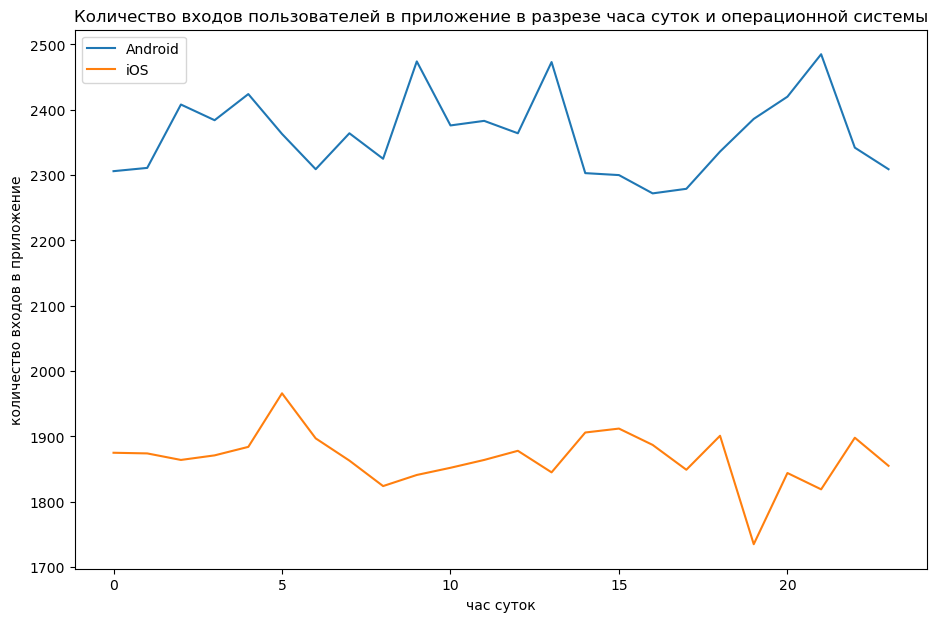

In [ ]:
df_add_opened_os = (
    df_gett[["os", "hour", "app_opened"]].groupby(["os", "hour"]).sum().reset_index()
)
list_os = df_add_opened_os.os.unique().tolist()
for os in list_os:
    plt.plot(
        df_add_opened_os[(df_add_opened_os["os"] == os)].hour,
        df_add_opened_os[(df_add_opened_os["os"] == os)].app_opened,
    )
plt.title(
    "Количество входов пользователей в приложение в разрезе часа суток и операционной системы"
)
plt.xlabel("час суток")
plt.ylabel("количество входов в приложение")
plt.legend(list_os)
;

#### Результаты, на первый взгляд, позволяют сделать вывод, что обладатели гаджетов с Android активнее используют приложение. Но в одной ли активности дело?   
#### Каково вообще количество зарегистрированных пользователей в разрезе применяемой ими операционной системы?

In [ ]:
df_os = (
    df_gett.groupby(["os", "user_id"])
    .count()
    .reset_index()[["os", "user_id"]]
    .groupby("os")
    .count()
)

In [ ]:
print(
    f"Пользователей Android: {df_os.iloc[0][0]} ({(df_os.iloc[0][0] / df_os.user_id.sum()*100).round(2)} %)\nПользователей iOS: {df_os.iloc[1][0]} ({(df_os.iloc[1][0] / df_os.user_id.sum()*100).round(2)} %)"
)
print(f"Разница: {df_os.iloc[0][0] - df_os.iloc[1][0]} в пользу Android os")

Пользователей Android: 22154 (51.82 %)
Пользователей iOS: 20594 (48.18 %)
Разница: 1560 в пользу Android os


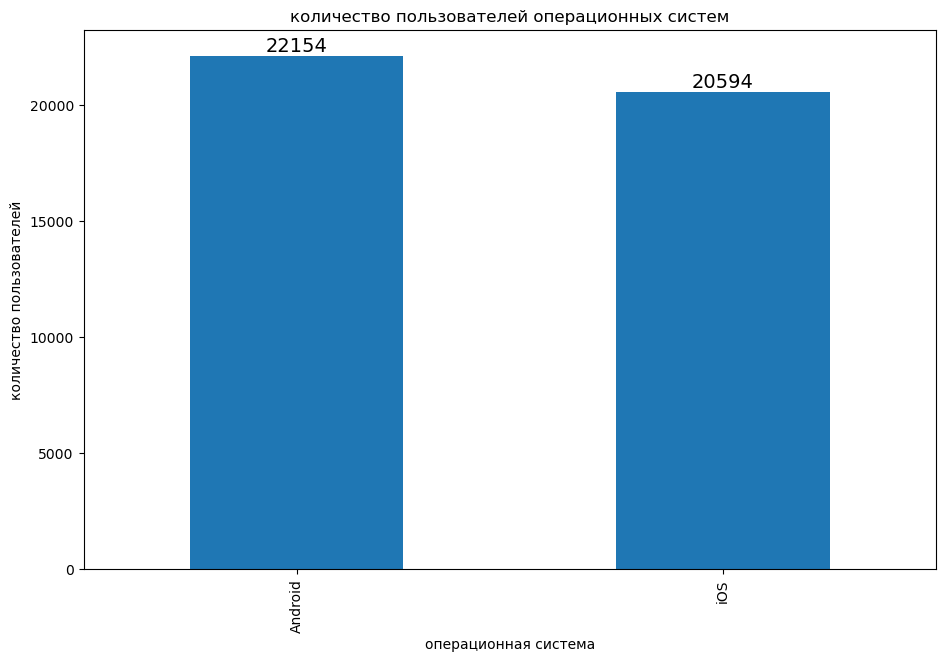

In [ ]:
df_os.plot(
    kind="bar",
    title="количество пользователей операционных систем",
    xlabel="операционная система",
    ylabel="количество пользователей",
    stacked=False,
    legend=False,
)
;
for i, val in enumerate(df_os.values):  # подписи столбцов
    plt.text(
        i,
        val,
        val[0],
        horizontalalignment="center",
        verticalalignment="bottom",
        fontdict={"size": 14},
    )

#### Видно, что количество зарегистрированных пользователей, предпочитающих Android, на 1560 человек больше iOS-пользователей.
#### На следующей диаграмме отражено превышение количества пользователей Android (уникальных пользователей, а не входов в приложение) над количеством пользователей iOS в разрезе часа суток.

''

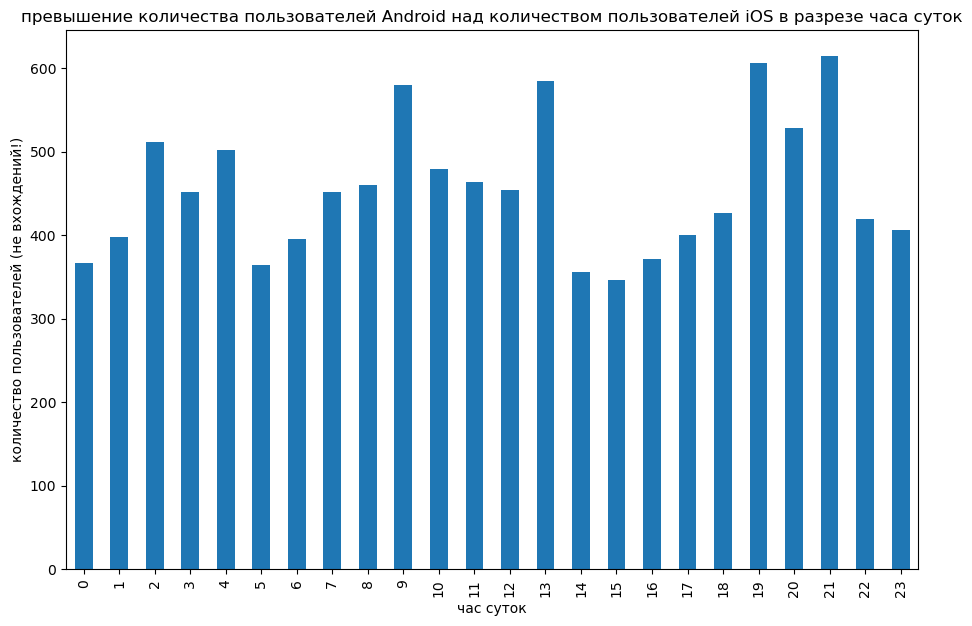

In [ ]:
df_osperh = (
    df_gett.groupby(["hour", "os", "user_id"])
    .count()
    .reset_index()
    .groupby(["hour", "os"])
    .count()[["user_id"]]
).reset_index()
df_osperh_pt = df_osperh.pivot_table(
    index="hour", columns="os", values="user_id", aggfunc=sum
)
df_osperh_pt["delta"] = df_osperh_pt.Android - df_osperh_pt.iOS
df_osperh_pt.delta.plot(
    kind="bar",
    title="превышение количества пользователей Android над количеством пользователей iOS в разрезе часа суток",
    xlabel="час суток",
    ylabel="количество пользователей (не вхождений!)",
)
;

### Таким образом, можно сделать вывод, что активность использования приложения пользователями обеих операционных систем сопроставима. В приложении зергистрировано больше Android-пользователей, но этот факт с лёгкостью может быть объяснён тем, что таковых пользователей в целом больше.
### **Предметом дальнейшего изучения** могут стать действия пользователей в период с 17:00 до 22:00, когда активность обладателей Android отчего-то растёт, а активность iOS-пользователей, наоборот,снижается.

## **2. Area chart**
### Действия пользователей в приложении в разрезе часа суток

''

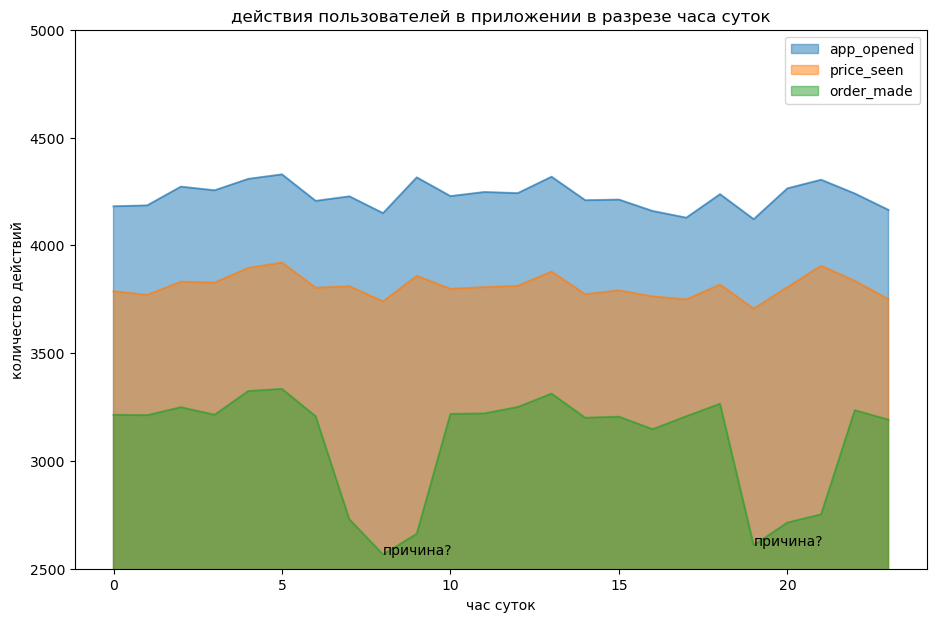

In [ ]:
df_user_act = (
    df_gett[["hour", "app_opened", "price_seen", "order_made"]].groupby("hour").sum()
)
df_user_act.plot(
    kind="area",
    title="действия пользователей в приложении в разрезе часа суток",
    xlabel="час суток",
    stacked=False,  # прозрачность областей
    ylabel="количество действий",
)
plt.ylim(2500, 5000)
plt.text(8, 2566, "причина?")
plt.text(19, 2609, "причина?")
;

### Пользователи входят в приложение, вводят данные поездки и узнают цену, делают заказ. Но если первые два действия достаточно хорошо коррелируют между собой, то значение конверсии заказов в поездки в период с 06:00 до 08:00 и в период с 18:00 до 19:00 резко падает. **Причина такого поведения пользователей должна быть изучена.**

## **3. Гистограмма**
### а) распределение дистанции поездок

In [ ]:
print(
    f"Минимальная дистанция поездки: {df_gett.distance.min().round(3)} км\nМаксимальная дистанция поездки: {df_gett.distance.max().round(3)} км"
)

Минимальная дистанция поездки: 0.011 км
Максимальная дистанция поездки: 40.269 км


''

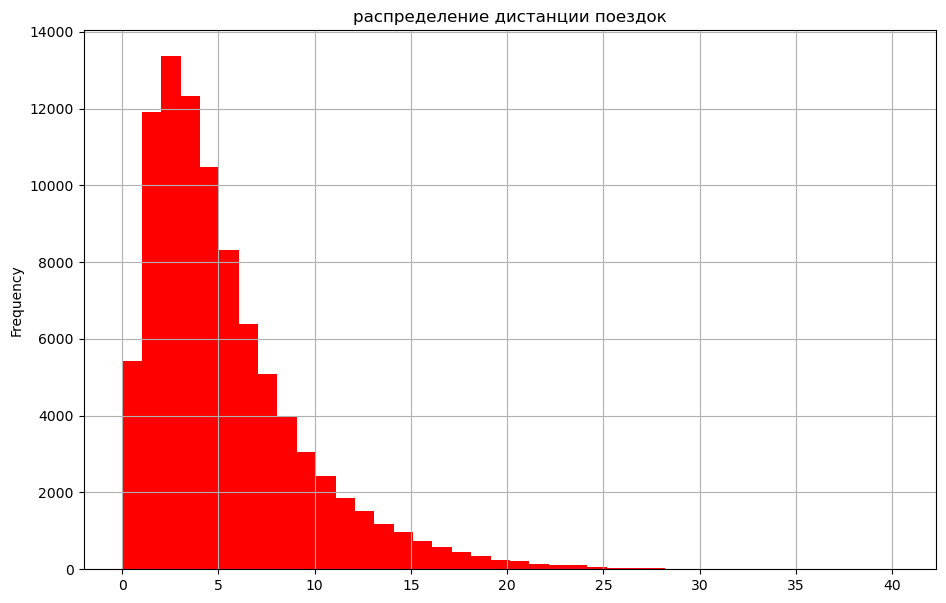

In [ ]:
df_gett.distance.plot(
    kind="hist",
    title="распределение дистанции поездок",
    bins=40,
    color="red",
    grid=True,
)
;

### Распределение дистанции поездок близко к распределению Пуассона. Просто будем иметь это ввиду.

### б) сравнение распределения дистанции поездок пользователей iOS vs Android

### Аналогичная ситуация возникает при сранении распределния дистанции поездок, соверщённых пользователями с различными ОС (первая гистограмма). На первый взгляд кажется, что пользователи Android совершают более длительные поездки, но не будем забывать - этих пользователей просто больше. Что видно на второй гистограмме, отражающей распределение нормализованных значений дистанции поездок - существенной разницы между пользователями различных ОС не наблюдается, у iOS даже прослеживается некоторое преимущество.

''

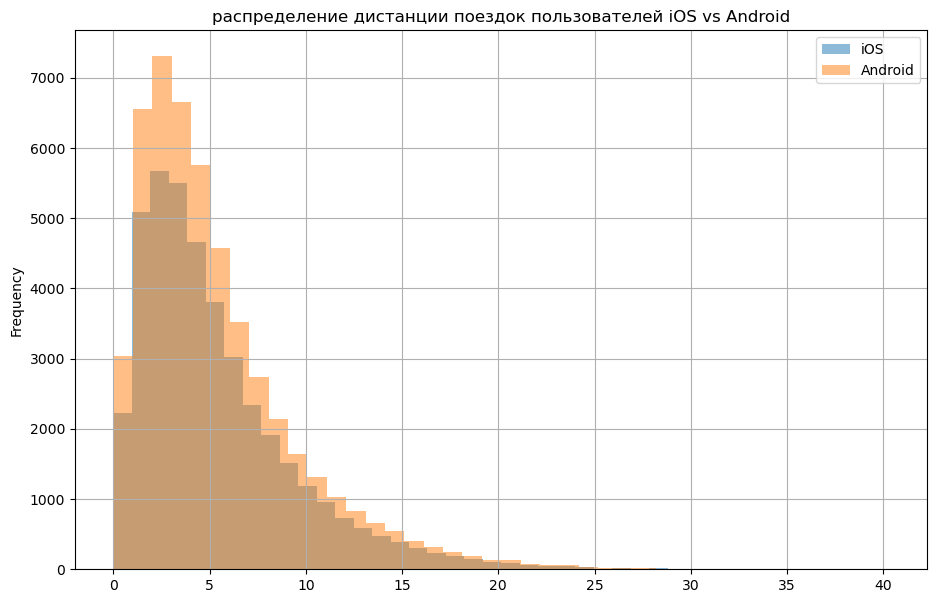

In [ ]:
df_gett[(df_gett.os == "iOS")].distance.plot(
    kind="hist", alpha=0.5, bins=40, density=False
)
df_gett[(df_gett.os == "Android")].distance.plot(
    kind="hist", alpha=0.5, bins=40, density=False, grid=True
)
plt.legend(df_gett.os.unique())
plt.title("распределение дистанции поездок пользователей iOS vs Android")
;

### в) сравнение плотности распределения нормализованной дистанции поездок пользователей iOS vs Android

''

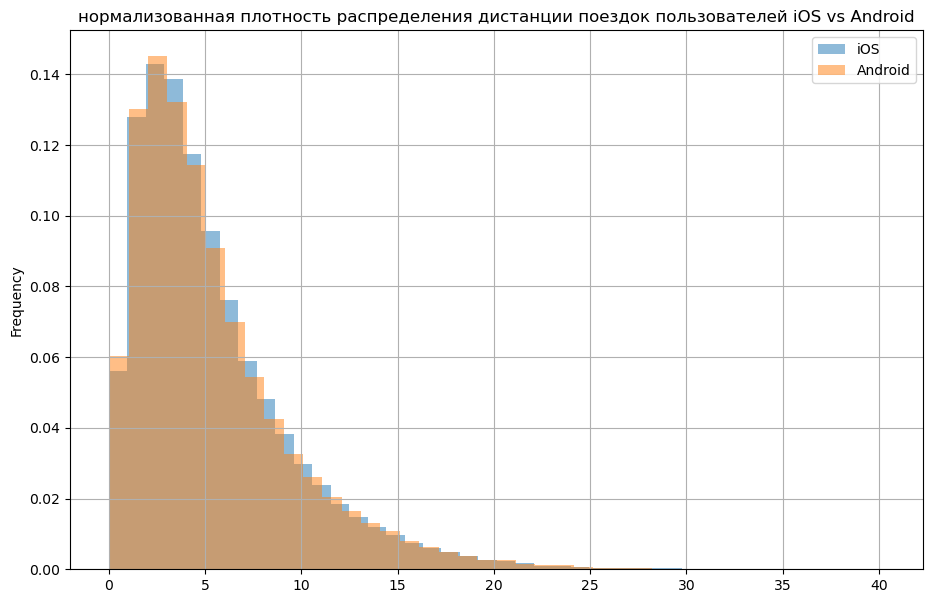

In [ ]:
df_gett[(df_gett.os == "iOS")].distance.plot(
    kind="hist", alpha=0.5, bins=40, density=True
)
df_gett[(df_gett.os == "Android")].distance.plot(
    kind="hist", alpha=0.5, bins=40, density=True, grid=True
)
plt.legend(df_gett.os.unique())
plt.title(
    "нормализованная плотность распределения дистанции поездок пользователей iOS vs Android"
)
;

## **4. Столбчатая диаграмма**
### количество заказанных тарифов в разрезе rfm-сегмента пользователя

''

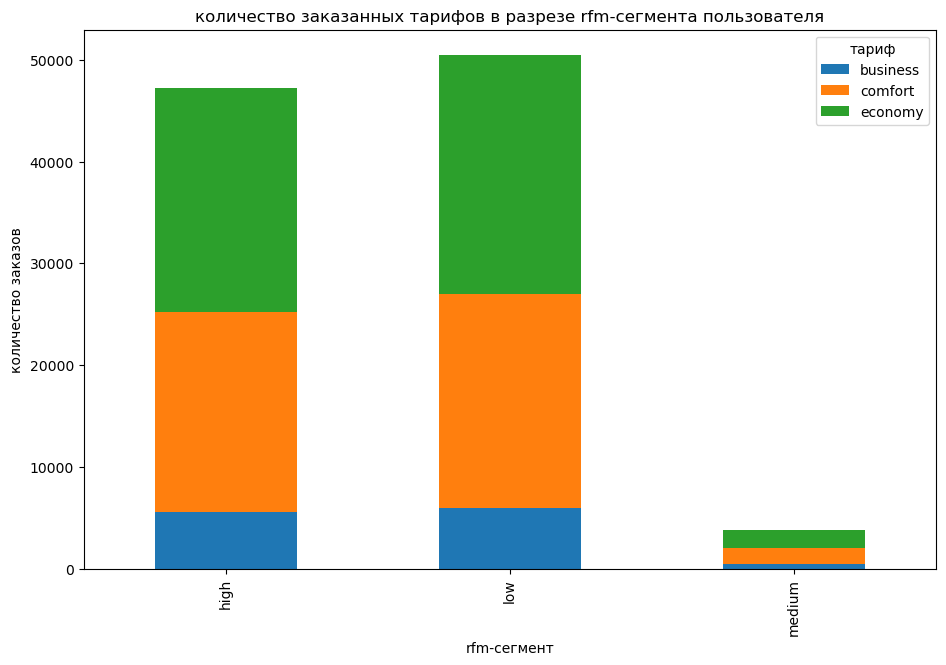

In [ ]:
df_gett.groupby(["rfm", "order_class"]).count()[["user_id"]].rename(
    {"user_id": "count"}, axis=1
).reset_index().pivot_table(
    index="rfm", columns="order_class", values="count", aggfunc=sum
).plot(
    kind="bar",
    title="количество заказанных тарифов в разрезе rfm-сегмента пользователя",
    xlabel="rfm-сегмент",
    ylabel="количество заказов",
    stacked=True,
)
plt.legend(title="тариф")
;

### Cтруктура распределения таривов внутри rfm-сегмента примерно одинакова. Вопросы могут возникнуть разве что к применяемой **методике сегментации**: отчего столь мал medium-сегмент?

<div class="alert alert-block alert-info">

## **Дополнительная часть (необязательная)**

### - построить дополнительно не менее 2 визуализаций (итого не менее 6);
### - в работе должны присутствовать следующие визуализации: boxplot, heatmap, scatter plot matrix;

## **5. "Ящик с усами"**
### Распределение дистанции поездок

### Очень много выбросов. Но, вспомнив характер распределения дистанции поездок из п. 3 (гистограммы), приходим к выводу, что так оно и должно быть.

''

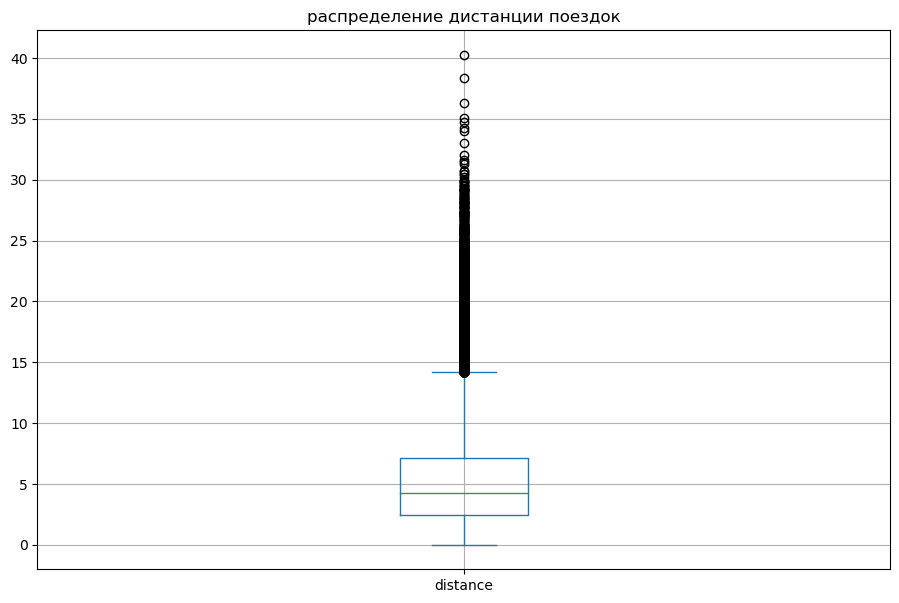

In [ ]:
df_gett["distance"].plot(kind="box", title="распределение дистанции поездок", grid=True)
;

## Узнаем количество действий в приложении для каждого пользователя и рассчитаем следующие метрики:
- конверсия заказов в поездки;
- доля успешно заверщённых поездок;
- доля заказов, сделанных из центра города.

In [ ]:
df_byuser = (
    df_gett[
        [
            "user_id",
            "app_opened",
            "price_seen",
            "order_made",
            "ride_completed",
            "user_cancelled",
            "city_center_order",
        ]
    ]
    .groupby("user_id")
    .sum()
)
df_byuser["conv"] = (df_byuser.order_made / df_byuser.price_seen).round(3)
df_byuser["completed_ratio"] = (df_byuser.ride_completed / df_byuser.order_made).round(
    3
)
df_byuser["center_ratio"] = (df_byuser.city_center_order / df_byuser.order_made).round(
    3
)
df_byuser

,app_opened,price_seen,order_made,ride_completed,user_cancelled,city_center_order,conv,completed_ratio,center_ratio
user_id,,,,,,,,,
100093,4,4,3,3,0,1,0.750,1.000,0.333
100118,5,5,5,4,1,0,1.000,0.800,0.000
100134,5,5,4,3,1,2,0.800,0.750,0.500
100166,5,5,4,3,1,1,0.800,0.750,0.250
100255,9,9,5,4,1,4,0.556,0.800,0.800
...,...,...,...,...,...,...,...,...,...
999870,2,2,1,0,1,2,0.500,0.000,2.000
999878,7,7,7,6,1,5,1.000,0.857,0.714
999945,5,5,4,4,0,4,0.800,1.000,1.000


## **6. Pair plot (scatter plot matrix)**
### Вид взаимосвязи между рассчитанными метриками

### Эта визуализация вообще мало что скажет, и сделана она, честно говоря, исключительно ради выполнения задания.

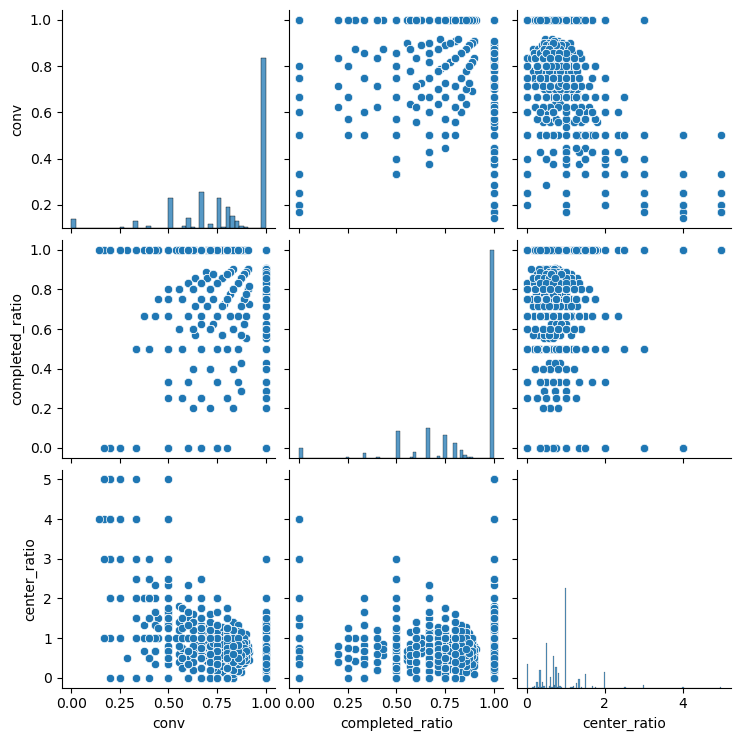

In [ ]:
sns.pairplot(df_byuser[["conv", "completed_ratio", "center_ratio"]])

## **7. Heatmap**   
### а) значение коэффициента линейной корреляции Пирсона

### Более или менее значимая отрицательная корреляция наблюдается между долей заказов из центра города и конверсией заказов в поездки. Видимо, из центра города проще уехать, шире выбор вариантов? В любом случае, **способ повышения конверсии для вызовов из центра города должен быть изучен**.

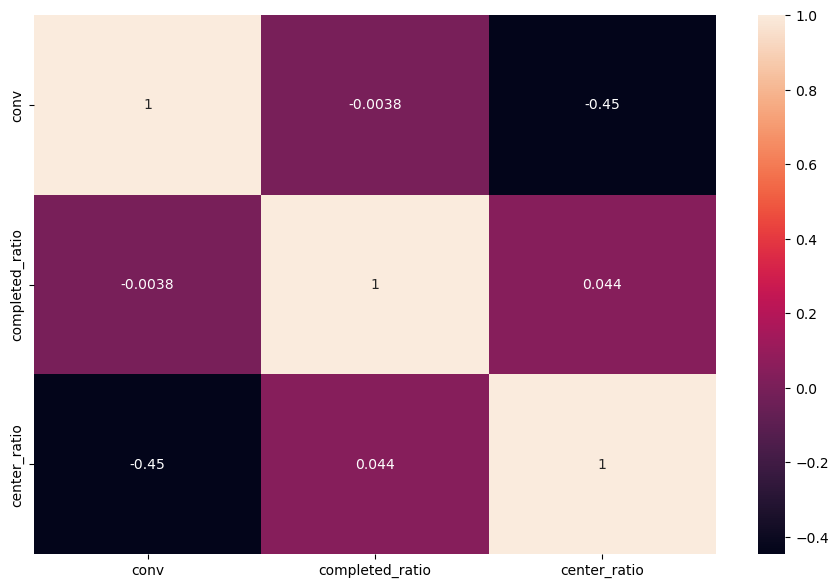

In [ ]:
hm = sns.heatmap(
    df_byuser[
        [
            "conv",
            "completed_ratio",
            "center_ratio",
        ]
    ].corr(),
    cbar=True,
    annot=True,
)

### _Две следующие визуализации также большой смысловой нагрузки не несут и приведены тут исключительно для примитивного DataArt'a_

### б) взаимосвязь конверсии заказов в поезки и доли успешно завершённых поездок для пользователей, которые либо не делали заказ, либо отменяли уже заказанные поезки

''

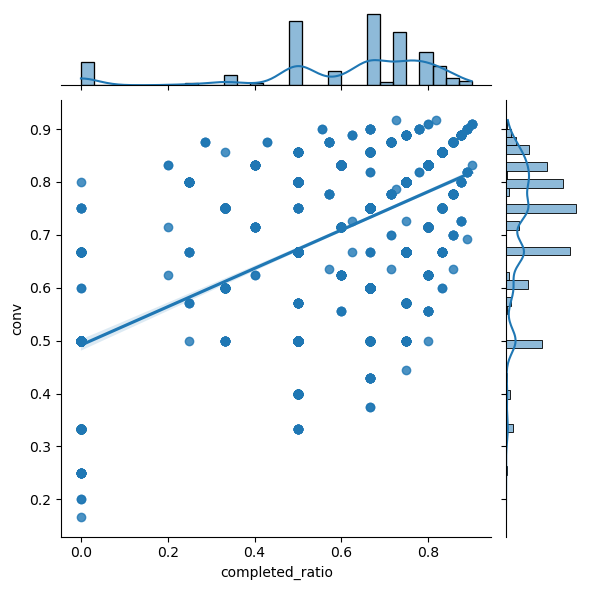

In [ ]:
sns.jointplot(
    x="completed_ratio",
    y="conv",
    data=df_byuser[(df_byuser.completed_ratio < 1) & (df_byuser.conv < 1)],
    kind="reg",
)
;

### в) взаимосвязь между конверсией, долей успешных поездок и заказами из центра города

''

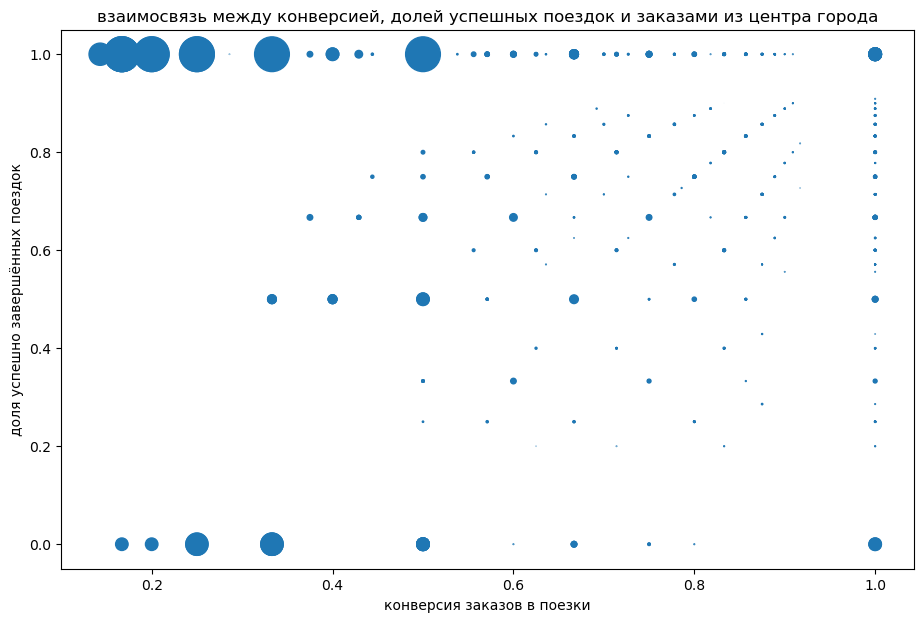

In [ ]:
# обработка числовых данных имеет мало смысла и выполнена в целях наглядности
df_byuser.plot(
    kind="scatter",
    x="conv",
    y="completed_ratio",
    s=df_byuser.center_ratio**4,  # умножение для масштаба
    title="взаимосвязь между конверсией, долей успешных поездок и заказами из центра города",
    xlabel="конверсия заказов в поезки",
    ylabel="доля успешно завершённых поездок",
)
;